### CFMs

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import os
import cv2
import numpy as np
import sklearn
from sklearn import preprocessing

In [2]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv_base = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2, bias=False),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2, bias=False),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.AdaptiveMaxPool2d(64)
        )
        
    def forward(self, x):
        x = self.conv_base(x)
        return x
    
model = AlexNet()

In [3]:
def get_hash_embedding(x):
    binary_coded = []
    adj = 8
    for row in range(0,x.shape[0]):
        for col in range(0,x.shape[1]):
            #key value
            x[row][col]
            #logics for the corners
            #corner 1
            if(row == 0 and col == 0):
                encode_num = []
                if(x[row][col] < x[row+1][col]):
                    encode_num.append(str(1))
                else:
                    encode_num.append(str(0))
                if(x[row][col] < x[row+1][col+1]):
                    encode_num.append(str(1))
                else:
                    encode_num.append(str(0))
                if(x[row][col] < x[row][col+1]):
                    encode_num.append(str(1))
                else:
                    encode_num.append(str(0))
                difference=adj-len(encode_num)
                for num in range(0,difference):
                    encode_num.append(str(0))
                binary_coded.append(''.join(encode_num))
    #             print("corner1")
    #             print(x[row][col])
            #cornor 2
            elif(row == 0 and col == x.shape[1]-1):
                encode_num = []
                if(x[row][col] < x[row][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                difference=adj-len(encode_num)
                for num in range(0,difference):
                    encode_num.append(str(0))
                binary_coded.append(''.join(encode_num))
    #             print("corner2")
    #             print(x[row][col])
            #cornor 3
            elif(row == x.shape[0]-1 and col == 0):
                encode_num = []
                if(x[row][col] < x[row-1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                if(x[row][col] < x[row][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                binary_coded.append(''.join(encode_num))
    #             print("corner3")
    #             print(x[row][col])
            #cornor 4
            elif(row == x.shape[0]-1 and col == x.shape[1]-1):
                encode_num = []
                if(x[row][col] < x[row-1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                difference=adj-len(encode_num)
                for num in range(0,difference):
                    encode_num.append(str(0))
                binary_coded.append(''.join(encode_num))
    #             print("corner4")
    #             print(x[row][col])
            #non cornor values.
            #logic for in between the elements.
            #condition 1
            elif(col == 0 and row !=0):
                encode_num = []
                if(x[row][col] < x[row-1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                if(x[row][col] < x[row+1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                binary_coded.append(''.join(encode_num))
            #condition 2
            elif(row == 0 and col !=0):
                encode_num = []
                encode_num.append("0")
                encode_num.append("0")
                if(x[row][col] < x[row][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                encode_num.append("0")
                binary_coded.append(''.join(encode_num))
            #condition 3
            elif(row == x.shape[0]-1  and col != x.shape[1]-1):
                encode_num = []
                if(x[row][col] < x[row-1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                if(x[row][col] < x[row][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                binary_coded.append(''.join(encode_num))
            #condition 4
            elif(row != x.shape[0]-1  and col == x.shape[1]-1):
                encode_num = []
                if(x[row][col] < x[row-1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                encode_num.append("0")
                binary_coded.append(''.join(encode_num))
            #condition 5
            else:
                encode_num = []
                if(x[row][col] < x[row-1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col-1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row+1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                if(x[row][col] < x[row-1][col+1]):
                    encode_num.append("1")
                else:
                    encode_num.append("0")
                binary_coded.append(''.join(encode_num))
    return binary_coded

In [4]:
def get_blocks(cord,radius,path):
    max_loc = cord
    circle_radius = radius

    img = cv2.imread(path)
    
    image_array = img.copy()
    mask = np.zeros(image_array.shape, dtype=np.uint8)
    cv2.circle(mask, max_loc, circle_radius, (255, 255, 255), -1, 8, 0)

    result_array = image_array & mask

    # Crop/center result (assuming max_loc is of the form (x, y))
    result_array1 = result_array[max(0,max_loc[1] - circle_radius):max(0,max_loc[1] + circle_radius),
                             max(0,max_loc[0] - circle_radius):max(0,max_loc[0] + circle_radius)]

    #convert to log polar space
    log_polar = cv2.logPolar(result_array1,(radius,radius),circle_radius,1)

    
    #divide into bllocks
    log_polar_gray  = log_polar
    M = int(log_polar_gray.shape[0]/4)
    N = int(log_polar_gray.shape[1]/4)

    slices = [log_polar_gray[x:x+M,y:y+N] for x in range(0,log_polar_gray.shape[0],M) for y in range(0,log_polar_gray.shape[1],N)]
    return slices
    

In [5]:
def get_coordinates_and_radius(keypoints_orb):
    keys = []
    for i in keypoints_orb:
        cord = [int(i) for i in i.pt]
        rad = int(i.size/2)
        keys.append([tuple(cord),rad])
        #print(tuple(cord),rad)
    return keys

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')  #mounting

Mounted at /content/gdrive


In [7]:
%cd '/content/gdrive/My Drive/purna images/'

/content/gdrive/My Drive/purna images


In [11]:
def hashing(x):
  ls1=[]
  for i in range(0,len(x)):
    for j in range(0,len(x)):
      string=""
      try:
        a=x[i,:][j]
        if a >  x[i-1,:][j-1] and i-1 != -1 and j-1 != -1: # upper left
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i-1,:][j] and i-1 != -1: # upper 
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i-1,:][j+1]  and i-1 != -1:# upper right
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i,:][j+1]: # right
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i+1,:][j+1]: #bottom right
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i+1,:][j]: # bottom
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i+1,:][j-1] and j-1 != -1: #bottom left
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      try:
        a=x[i,:][j]
        if a > x[i,:][j-1] and j-1 != -1:  # left
          string=string+str(1)
        else:
          string=string+str(0)
      except:
        string=string+str(0)
        pass
      ls1.append(string)
  return ls1


### ORB_CFM_Local_CNN_features_CHE

In [13]:
files_path="Copy_detection_Dataset/"

val =sorted([int(i.split(".")[0]) for i in os.listdir(files_path)]) #os.listdir wont give you file order
images = [str(i)+".jpg" for i in val] #getting files in order

total_images_features = []
total_images_hash_values = []

for i in images:
    #reading image
    img = cv2.imread(files_path+i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    #image to alexnet to get CFMs
    data_transform = transforms.ToTensor()
    img1 = data_transform(img)
    img2 = img1.unsqueeze(0)
    op = model(img2)
    output = np.array(op.detach().numpy()[0]) #1,256,height,width
    
    #calculating image and cfm areas
    img_area = img.shape[0]*img.shape[1]
    cfm_area = output.shape[1]*output.shape[2] 
    area_ratio = cfm_area/img_area
    
    #passing image to ORB
    orb = cv2.ORB_create(nfeatures=500)
    keypoints_orb, descriptors = orb.detectAndCompute(img, None)
#     print("key features in each image is:",len(keypoints_orb))
    keypoints = get_coordinates_and_radius(keypoints_orb)
    
    
    #Scaling CFM radius and coordinates
    cfm_radius = []
    cfm_coo = []
    for key in keypoints:
        cfm_radius.append(np.float32(area_ratio*key[1]))
        
        cfm_x = (output.shape[1]*key[0][0])/img.shape[0]
        cfm_y = (output.shape[2]*key[0][1])/img.shape[1]
        cfm_coo.append((np.float32(cfm_x),np.float32(cfm_y)))

    #Finding normalized radius from Minimum of 1 to B value
    val = [key[1] for key in keypoints]    
    x = np.array(cfm_radius)
    b = (max(val)-min(val))/(min(val))
#     print(b)
    a = 1
    normalized_radius=(b-a)*((x-x.min())/(x.max()-x.min()))+a
    
    all_keypoint_features = []
    output = np.array(op.detach().numpy()[0])
    for cord,rad in zip(cfm_coo,normalized_radius):
        feature_map = []
        for fmap in range(len(output)):
            op = np.sum(output[fmap][int(cord[0]):int(cord[0])+int(rad),int(cord[1]):int(cord[1])+int(rad)])
            feature_map.append(op)
        op1 = np.array(feature_map).reshape(1,256)
        norm_final = sklearn.preprocessing.normalize(op1, norm='l2', axis=1, copy=True, return_norm=False)
        all_keypoint_features.append(norm_final)    
#     print(all_keypoint_features[0].shape)#(1,256)

    keypoint_feat = all_keypoint_features[0]
    for keypoint in all_keypoint_features[1:]:
        keypoint_feat = np.vstack((keypoint_feat,keypoint))
    
#     print(keypoint_feat.shape)#(483,256)(500,256) 256 columns fixed
    total_images_features.append(keypoint_feat)
    
    expanded_radius = []
    for key,radius in keypoints:
        expand_r = int(int(radius/2)*3.2)
        expanded_radius.append(expand_r)
    
    cords = []
    for cord,radius in keypoints:
        cords.append(cord)
        
    all_hash_values = []
    for cord,ex_radius in zip(cords,expanded_radius):
        slices = get_blocks(cord,radius,files_path+i)
    #     print(len(slices))
        if len(slices) == 25 or len(slices) == 20:
            grey_intensities = np.round(np.array([np.mean(i) for i in slices]).reshape(5,int(len(slices)/5)),2)    
        else:
            grey_intensities = np.round(np.array([np.mean(i) for i in slices]).reshape(4,int(np.ceil(16/5))),2)
        #print(grey_intensities)
        #hash_val = get_hash_embedding(grey_intensities)
        hash_val = hashing(grey_intensities)
        #print(hash_val)
        break
        all_hash_values.append(hash_val)
    
    total_images_hash_values.append(all_hash_values)

In [14]:
img_feat = total_images_features[0]
for i in total_images_features[1:]:
    img_feat = np.vstack((img_feat,i))
    
print(img_feat.shape)

(16664, 256)


In [15]:
np.sqrt(256*27402) #as per literature reading

2648.567914930633

In [16]:
total_images_features[0].shape #no of keypoints for first image, liked that for all images(kp may vary)

(500, 256)

In [17]:
len(total_images_hash_values)

38

In [18]:
len(total_images_hash_values[1]) #same no of hash values as keypoints for all images

0

### 3. Local_CNN_VBOW

In [19]:
import scipy
import random

random.seed(101)

from scipy.cluster.vq import kmeans,vq #vq stands for vector quantization
k= 50
voc1,variance=kmeans(img_feat,k,1)

database_words = []
im_features=np.zeros((len(os.listdir(files_path)),k),"float32")
for i in range(len(os.listdir(files_path))):
    words1,distance=vq(total_images_features[i],voc1)
    database_words.append(words1)
    for w in words1:
        im_features[i][w]+=1

In [20]:
im_features.shape

(38, 50)

In [21]:
im_features[0].shape

(50,)

In [22]:
im_features[0] #no of occcurence of each cluster till 50 cluster with K array size

array([59.,  0., 37., 29.,  0.,  3.,  0.,  0.,  0.,  0., 14.,  0.,  0.,
        0.,  0.,  0.,  1., 50.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  6., 17., 74., 40.,  0.,  0.,  5.,  0., 45.,  0.,
        0.,  0.,  0.,  0., 18.,  0.,  0., 32.,  0.,  0.,  0.],
      dtype=float32)

In [23]:
database_words[0] #each and every keypoint grouped to one cluster.

array([31, 20, 31, 17, 31,  0,  2, 31,  3, 37, 31, 31, 31, 20,  2, 31, 31,
        0, 20, 30, 31,  0,  2, 32, 17,  0, 31, 31, 20, 37,  3, 31, 31,  0,
       30, 30, 20, 43, 30, 37,  2, 31,  3, 20, 32, 31, 31, 43,  0, 31, 20,
        3, 17, 20, 17, 20, 46, 43, 20,  0, 35, 29, 32, 17, 31, 17, 43, 17,
       17, 29, 32, 31,  2, 17, 20,  0, 17, 31,  0,  0, 29, 17, 16, 31,  2,
       31, 17, 10, 43,  0, 43, 20, 31,  0, 31, 20, 20,  5, 31, 43,  5, 37,
       17, 43,  5, 43, 20, 43, 17, 43,  0, 31, 29, 31, 30, 31, 37, 43, 20,
       31, 43, 30,  3, 37, 32,  0, 37, 31, 46,  3, 30, 31, 20, 17, 37, 20,
        2, 20, 29, 31,  0, 10,  3, 17, 20,  2, 31,  0,  2, 46, 32, 31,  0,
        2,  3, 20, 31, 32,  0, 17,  0,  0,  3, 31, 31,  3, 30,  0, 31, 31,
        3, 20, 17,  0,  0,  2, 32, 31, 32,  3, 32,  2, 32, 17, 43, 32, 46,
        2, 43, 32, 20,  0, 31, 20, 32, 37, 20, 10, 17, 31, 31, 37, 37, 32,
       20, 31, 37,  0, 10, 20, 37, 46, 17, 20, 20, 20, 31, 31, 37, 43, 37,
       30, 46,  0, 31, 31

## querry_image

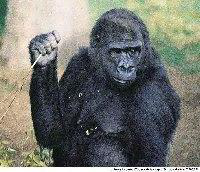

In [24]:
import os
#lets take a sample image
path = "Copy_detection_Dataset/15.jpg"
from PIL import Image
Image.open(path)

In [25]:
from torchvision import transforms
file = Image.open(path)

data_transform = transforms.ToTensor()
img1 = data_transform(file)
op = model(img1.unsqueeze(0))

In [26]:
output = np.array(op.detach().numpy()[0]) #1,256,height,width

In [27]:
output.shape

(256, 9, 11)

We got 256 CFMs, each cfm size is 9 height and 11 width

In [28]:
import cv2
img = cv2.imread(path)

In [29]:
orb = cv2.ORB_create(nfeatures=500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
#     print("key features in each image is:",len(keypoints_orb))
keypoints = get_coordinates_and_radius(keypoints_orb)

In [30]:
img.shape

(172, 200, 3)

In [31]:
#Scaling CFM radius and coordinates
cfm_radius = []
cfm_coo = []
for key in keypoints:
    cfm_radius.append(np.float32(area_ratio*key[1]))

    cfm_x = (output.shape[1]*key[0][0])/img.shape[0]
    cfm_y = (output.shape[2]*key[0][1])/img.shape[1]
    cfm_coo.append((np.float32(cfm_x),np.float32(cfm_y)))

#Finding normalized radius from Minimum of 1 to B value
val = [key[1] for key in keypoints]    
x = np.array(cfm_radius)
b = (max(val)-min(val))/(min(val))
#     print(b)
a = 1
normalized_radius=(b-a)*((x-x.min())/(x.max()-x.min()))+a

In [32]:
all_keypoint_features = []
output = np.array(op.detach().numpy()[0])
for cord,rad in zip(cfm_coo,normalized_radius):
    feature_map = []
    for fmap in range(len(output)):
        op = np.sum(output[fmap][int(cord[0]):int(cord[0])+int(rad),int(cord[1]):int(cord[1])+int(rad)])
        feature_map.append(op)
    op1 = np.array(feature_map).reshape(1,256)
    norm_final = sklearn.preprocessing.normalize(op1, norm='l2', axis=1, copy=True, return_norm=False)
    all_keypoint_features.append(norm_final)    
#     print(all_keypoint_features[0].shape)#(1,256)


In [33]:
keypoint_feat = all_keypoint_features[0]
for keypoint in all_keypoint_features[1:]:
    keypoint_feat = np.vstack((keypoint_feat,keypoint))

In [34]:
keypoint_feat.shape #324 keypoints only for a test image

(324, 256)

### we got 256 local CNN features for al the 430 Keypoints. Now Generating CHE for all 430 keypoints

In [35]:
img2 = cv2.drawKeypoints(img, keypoints_orb, None)

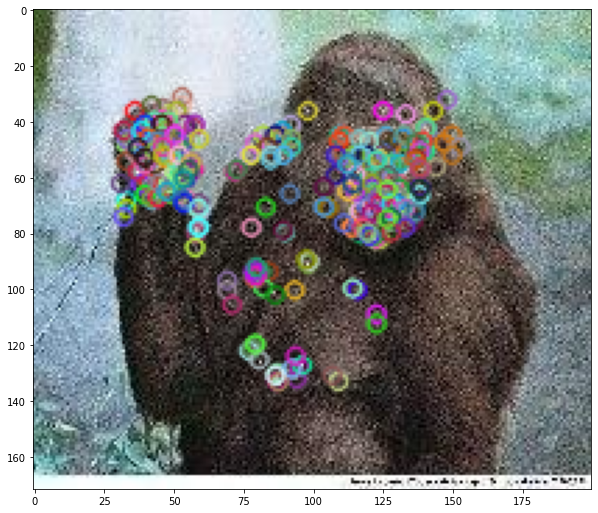

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
plt.imshow(img2)
plt.show()

In [37]:
expanded_radius = []
for key,radius in keypoints:
    expand_r = int(int(radius/2)*3.2)
    expanded_radius.append(expand_r)

In [38]:
cords = []
for cord,radius in keypoints:
    cords.append(cord)

In [39]:
path = "Copy_detection_Dataset/15.jpg"

all_hash_values = []
for cord,ex_radius in zip(cords,expanded_radius):
    slices = get_blocks(cord,radius,path)
#     print(len(slices))
    if len(slices) == 25 or len(slices) == 20:
        grey_intensities = np.round(np.array([np.mean(i) for i in slices]).reshape(5,int(len(slices)/5)),2)    
    else:
        grey_intensities = np.round(np.array([np.mean(i) for i in slices]).reshape(4,int(np.ceil(16/5))),2)
    hash_val = get_hash_embedding(grey_intensities)
    all_hash_values.append(hash_val)

In [40]:
len(all_hash_values) #324 hash points for our querry image

324

In [41]:
import scipy
import random
random.seed(101)

from scipy.cluster.vq import kmeans,vq #vq stands for vector quantization
k= 50
voc,variance=kmeans(keypoint_feat,k,1) #all keypoint features of all images

q_features=np.zeros((1,k),"float32")    
words,distance=vq(keypoint_feat,voc) #all keypoint features of single image
for w in words:
    q_features[0][w]+=1

In [42]:
import sys
import numpy 
numpy.set_printoptions(threshold=sys.maxsize)

In [43]:
q_features #It returns a vector of length n_clusters with its frequency count

array([[55.,  7., 39., 23., 16., 45., 17.,  9.,  6., 26., 10.,  4., 22.,
         8.,  2., 19.,  7.,  8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],
      dtype=float32)

### data base image information

In [44]:
img_feat.shape

(16664, 256)

In [45]:
total_images_features[0].shape #local CNN features

(500, 256)

In [46]:
len(total_images_hash_values)

38

In [47]:
len(total_images_hash_values[0]) #hash embeddings

0

In [48]:
im_features.shape #VBOW

(38, 50)

In [49]:
voc1.shape #47 clusters

(47, 256)

### Querry image information

In [50]:
keypoint_feat.shape #Local CNN Features

(324, 256)

In [51]:
len(all_hash_values) #hash embeddings

324

In [52]:
all_hash_values

[['00000000',
  '00110010',
  '00000010',
  '00000000',
  '10001000',
  '11110011',
  '11000001',
  '11100000',
  '00001000',
  '11111111',
  '11011111',
  '11011000',
  '00001000',
  '01111110',
  '00011110',
  '00011000',
  '00000000',
  '01100010',
  '00000010',
  '00000000'],
 ['11000000',
  '00111100',
  '00111100',
  '11100000',
  '00001100',
  '00111000',
  '00111000',
  '00110000',
  '00000010',
  '00000000',
  '01110000',
  '11101000',
  '10000001',
  '11110000',
  '11110111',
  '01001000',
  '10000000',
  '11100000',
  '11100011',
  '00000000'],
 ['11100000',
  '00001110',
  '00000010',
  '00000000',
  '00000111',
  '00001101',
  '10111111',
  '11011000',
  '10000111',
  '00000110',
  '00000010',
  '00000000',
  '10000011',
  '10000011',
  '10000011',
  '11000000'],
 ['10000000',
  '00111010',
  '00000010',
  '00000000',
  '00001100',
  '01111101',
  '11111111',
  '11011000',
  '00000110',
  '00001110',
  '00000110',
  '00001000',
  '10000011',
  '00000011',
  '10000011',
  '

In [54]:
q_features

array([[55.,  7., 39., 23., 16., 45., 17.,  9.,  6., 26., 10.,  4., 22.,
         8.,  2., 19.,  7.,  8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],
      dtype=float32)

In [55]:
sum(q_features[0]) # we have 324 feature in querry image

324.0

In [56]:
voc.shape #19 clusters in our querry image

(19, 256)

#### Inverted index

In [57]:
#generating filepath:im_features in dictionary

image_vocab = {} #filepath,vocab
for file_name,im_feature in zip(images,im_features):
    image_vocab[file_name] = list(im_feature)

In [58]:
from collections import defaultdict

inv_indx = defaultdict(list) #defaultdict(list, {})

for imgidx,vocab in image_vocab.items():
    for idx,count in enumerate(vocab):
        if int(count) > 0:
            inv_indx[idx].append(imgidx)

 for all the images, which share the same cluster are represented as

    { 0:
    img1.png
    img2.png
    img3.png
     ,
     ,
     }

In [59]:
inv_indx

defaultdict(list,
            {0: ['1.jpg',
              '2.jpg',
              '4.jpg',
              '6.jpg',
              '7.jpg',
              '8.jpg',
              '9.jpg',
              '11.jpg',
              '13.jpg',
              '14.jpg',
              '15.jpg',
              '18.jpg',
              '19.jpg',
              '20.jpg',
              '22.jpg',
              '23.jpg',
              '26.jpg'],
             1: ['23.jpg', '24.jpg', '25.jpg', '31.jpg', '33.jpg', '36.jpg'],
             2: ['1.jpg',
              '2.jpg',
              '7.jpg',
              '8.jpg',
              '10.jpg',
              '13.jpg',
              '16.jpg',
              '22.jpg',
              '29.jpg',
              '32.jpg',
              '33.jpg',
              '38.jpg'],
             3: ['1.jpg',
              '2.jpg',
              '3.jpg',
              '4.jpg',
              '6.jpg',
              '8.jpg',
              '9.jpg',
              '10.jpg',
              '11.jpg',

In [60]:
image_vocab['38.jpg']

[0.0,
 0.0,
 4.0,
 0.0,
 154.0,
 0.0,
 59.0,
 0.0,
 0.0,
 2.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 56.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 26.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.0,
 0.0,
 0.0,
 28.0,
 0.0,
 0.0,
 0.0,
 78.0,
 36.0,
 0.0,
 0.0,
 0.0,
 27.0,
 0.0,
 0.0,
 0.0]

In [61]:
for indx,i in enumerate(im_features[37]):
    if i> 0:
        print(indx,i)

2 4.0
4 154.0
6 59.0
9 2.0
11 6.0
16 4.0
18 56.0
20 5.0
24 1.0
26 26.0
28 3.0
34 11.0
37 28.0
41 78.0
42 36.0
46 27.0


In [62]:
im_features[37]

array([  0.,   0.,   4.,   0., 154.,   0.,  59.,   0.,   0.,   2.,   0.,
         6.,   0.,   0.,   0.,   0.,   4.,   0.,  56.,   0.,   5.,   0.,
         0.,   0.,   1.,   0.,  26.,   0.,   3.,   0.,   0.,   0.,   0.,
         0.,  11.,   0.,   0.,  28.,   0.,   0.,   0.,  78.,  36.,   0.,
         0.,   0.,  27.,   0.,   0.,   0.], dtype=float32)

In [63]:
database_words[37]

array([37, 26, 42,  4,  4, 26,  4, 41, 41, 41, 41,  4,  6, 41,  4, 41,  6,
        4, 42, 42, 37, 18,  6,  6,  4, 26, 42,  4, 18, 16, 20, 11,  4, 34,
        4, 37, 11,  6,  4,  4, 41, 34,  4, 41, 41,  4, 37, 41,  4, 37, 37,
        4, 41,  4,  6,  4, 16, 37,  4,  4,  4, 42,  4, 18, 41,  4, 18, 41,
       37,  9, 18,  4,  6,  4,  6,  4,  4,  4,  4, 34,  6,  4,  6, 41,  4,
        6,  6,  4,  4, 18,  4,  4, 37, 41,  6, 18, 11, 24, 41,  4,  4, 42,
       42,  6,  4, 41, 18, 42, 34, 37, 41,  4, 20, 42,  4, 41,  4, 37, 42,
       26, 41, 41,  4,  6,  4, 41,  4, 42,  4, 37,  4, 18,  4, 41,  6,  4,
        4, 41, 18, 41, 41, 41, 18,  4, 41, 34, 18, 41,  4, 37, 46,  4, 34,
       42, 46, 41,  4, 41,  6, 34,  4, 41,  4, 37,  6, 18, 46,  6, 11,  4,
       18,  4,  4, 41,  6, 18, 16, 26, 26, 41, 42, 11,  4, 11,  4,  4, 42,
       18, 37,  6,  6,  6, 46,  4, 42,  4, 26,  4,  4, 46,  4, 16,  4,  4,
       42, 37, 46,  4,  4,  4, 18, 42,  4, 41,  4, 41,  6, 37,  6, 41,  4,
       41,  4, 41, 46,  4

In [64]:
from collections import defaultdict
inverted_indx = defaultdict(list) 


for image_id,feature,kp in zip(images,im_features,database_words): #101.jpg, im_feature,430kp
    for indx,count in enumerate(feature): #for every feature in im_features
        if int(count)>0: #if fequency value is >0
            no = int(imgidx.split(".")[0]) # image no
            hashes = [{ind:total_images_hash_values[no-1][ind]}  for ind,j in enumerate(kp) if j == indx]
            inverted_indx[indx].append([image_id,hashes])

IndexError: ignored

In [65]:
voc1.shape

(47, 256)

In [66]:
inverted_indx

defaultdict(list, {})

In [ ]:
all_hash_values[0]

['00000000',
 '00110010',
 '00000010',
 '00000000',
 '10001000',
 '11110011',
 '11000001',
 '11100000',
 '00001000',
 '11111111',
 '11011111',
 '11011000',
 '00001000',
 '01111110',
 '00011110',
 '00011000',
 '00000000',
 '01100010',
 '00000010',
 '00000000']

In [ ]:
#[1][clusters][all the images][keypoints][CHE]
#query [1][clusters][one image][keypoints][Che]

0 , 0 

In [ ]:
inverted_indx

Output hidden; open in https://colab.research.google.com to view.

Now the next step is to get the hash sequence of a keypoints that belong to the cluster 4. lets say we have 10 keypoints, each kehypoint will have the 25 hash embedding each one with 8.

lets say we take one key point in that cluster in that matched image.

so 8*25(M*N gave 25 slices for this keypoint), now each element in CH(q) with each element in CH(d)., i.e 
(10101011 - 10110101) + (_____________)+ .......25 and (10101011 - 10110101) + (__)+ .......25
------------------------------------------------------------------------------------------------------------------------------
                        8*25
                        
 dist = 0.56
dist_T is 0.45 
so dist > dist_T , so not a match 



#### inverted_index for querry image(you dont need)

In [ ]:
#for querry image
#generating filepath:im_features in dictionary

q_image = ['15.jpg']
q_image_vocab = {} #filepath,vocab
for file_name,q_feature in zip(q_image,q_features):
    q_image_vocab[file_name] = list(q_feature)


In [ ]:
q_image_vocab #{"090_0026.jpg:[]"}

{'15.jpg': [17.0,
  6.0,
  45.0,
  1.0,
  29.0,
  39.0,
  17.0,
  21.0,
  26.0,
  10.0,
  15.0,
  9.0,
  45.0,
  17.0,
  6.0,
  9.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [ ]:
from collections import defaultdict

q_inv_indx = defaultdict(list) #defaultdict(list, {})

for imgidx,vocab in q_image_vocab.items():
    for idx,count in enumerate(vocab):
        if int(count) > 0:
            q_inv_indx[idx].append(imgidx)

In [ ]:
q_inv_indx

defaultdict(list,
            {0: ['15.jpg'],
             1: ['15.jpg'],
             2: ['15.jpg'],
             3: ['15.jpg'],
             4: ['15.jpg'],
             5: ['15.jpg'],
             6: ['15.jpg'],
             7: ['15.jpg'],
             8: ['15.jpg'],
             9: ['15.jpg'],
             10: ['15.jpg'],
             11: ['15.jpg'],
             12: ['15.jpg'],
             13: ['15.jpg'],
             14: ['15.jpg'],
             15: ['15.jpg'],
             16: ['15.jpg']})

In [ ]:
from collections import defaultdict
q_inv_indx = defaultdict(list) 


#for image_id,feature,kp in zip(q_image,q_feature,words): 
    #print(feature)#101.jpg, im_feature,430kp
for indx,count in enumerate(q_feature): 
  #for every feature in im_features
  if int(count)>0: 
    #if fequency value is >0
    no = int(q_image[0].split(".")[0]) # image no
    hashes = [{ind:all_hash_values[ind]}  for ind,j in enumerate(words) if j == indx]
    q_inv_indx[indx].append([image_id,hashes])


           

NameError: ignored

In [ ]:
'''
match_images = []

for i in q_inv_indx.keys():
    if i in inv_indx.keys():
        match_images.append(inv_indx[i])

final_match = []

for cluster in match_images:
    for imagename in cluster:
        if imagename not in final_match:
            final_match.append(imagename)
'''

In [ ]:
inverted_indx

In [ ]:
for key,value in inverted_indx.items():
  print(key,value[0])

In [ ]:
#q_inv_indx
inverted_indx

In [ ]:
im_features[0]

In [ ]:
dict2={}
for i,j in enumerate(apple):
  if j!=0:
    dict2[i]=j

In [ ]:
dict2

In [ ]:
N=len(dict2)
import sys
import math
IDF = []
for (term,term_frequency) in dict2.items():
  term_IDF = math.log(float(N) / term_frequency)
  IDF.append(( term_IDF, term ))
  IDF.sort(reverse=True)

In [ ]:
IDF

In [ ]:
# for database_words

In [ ]:
database_words

In [ ]:
ball=[]
for i in range(0,len(database_words)):
  ball.append(list(database_words[i]))
from nltk import flatten
cat= flatten(ball)

In [ ]:
len(cat)

In [ ]:
import collections
ctr = collections.Counter(cat)
final_dict=(dict(ctr))
final_dict = dict(collections.OrderedDict(sorted(final_dict.items())))
print(final_dict)

In [ ]:
N=len(final_dict)
import sys
import math
IDF_database = []
for (term,term_frequency) in final_dict.items():
  term_IDF = math.log(float(N) / term_frequency)
  IDF_database.append(( term_IDF, term ))
  #IDF_database.sort(reverse=True)

In [ ]:
IDF_database